# Tarefa 5 - Agrupamento

### Importando as Bibliotecas

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans 

### Importando dos Dados

Os dados do nosso projeto possuem, em todos os atributos menos um, dados categóricos, portanto, decidimos utilizar outra base de dados para realizar esta tarefa, no caso, dados sobre as [informações nutricionais do menu do McDonald's](https://www.kaggle.com/mcdonalds/nutrition-facts), essa base de dados contém na sua maioria, atributos não categóricos.

In [2]:
df = pd.read_csv("data/mcdonalds_menu.csv",delimiter=",")
df.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


In [3]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [4]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


<AxesSubplot:xlabel='Carbohydrates', ylabel='Sugars'>

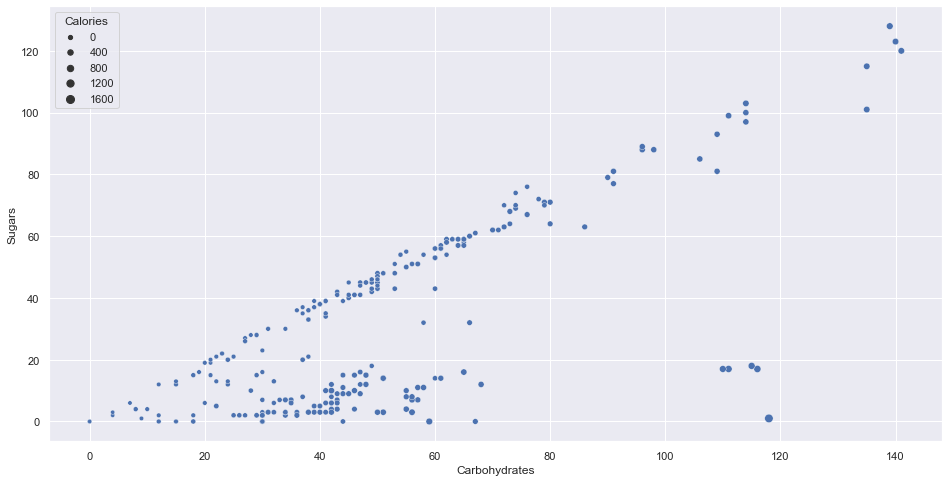

In [5]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.scatterplot(data=df, x="Carbohydrates", y="Sugars", size="Calories")

### Agrupamento

<AxesSubplot:xlabel='Carbohydrates', ylabel='Sugars'>

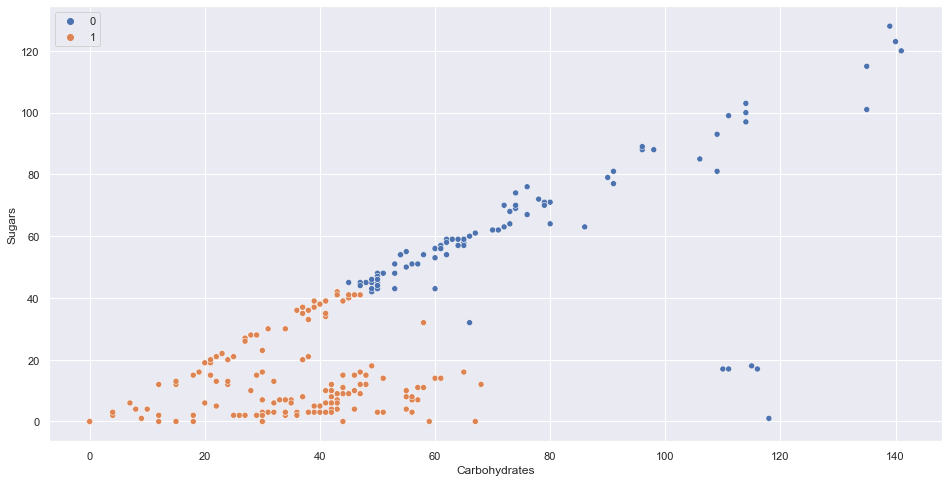

In [6]:
df_group = df[["Carbohydrates", "Sugars"]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_group)
# kmeans.labels_
sns.scatterplot(data=df_group, x="Carbohydrates", y="Sugars", hue=kmeans.labels_)

Pelo *scatterplot*, temos que os produtos com um menor número de açúcares $(> 40)$ e de carboidratos $(>45)$ foram atribuídos majoritariamente ao grupo **1**, tendo o caso de um pequeno grupo com baixo número de açucares e um alto de carboidratos pertencentes ao grupo **0**, e adicionalmente, aqueles com alto número de açúcares e carboidratos foram atribuídos a este grupo. 

In [7]:
df['cluster'] = kmeans.labels_
gpby = df.groupby('cluster').mean()

gpby

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
cluster,,,,,,,,,,,,,,,,,,,,,
0,472.333333,127.388889,14.194444,21.900000,7.383333,36.766667,0.327778,51.000000,17.022222,298.333333,...,74.455556,24.833333,1.388889,5.655556,61.311111,12.355556,14.000000,5.133333,32.577778,5.277778
1,313.176471,126.941176,14.150000,21.770588,5.279412,26.364706,0.138235,57.029412,19.117647,600.264706,...,32.994118,10.988235,1.758824,6.994118,12.541176,13.858824,13.123529,10.335294,14.829412,9.035294


<AxesSubplot:xlabel='cluster', ylabel='Calories'>

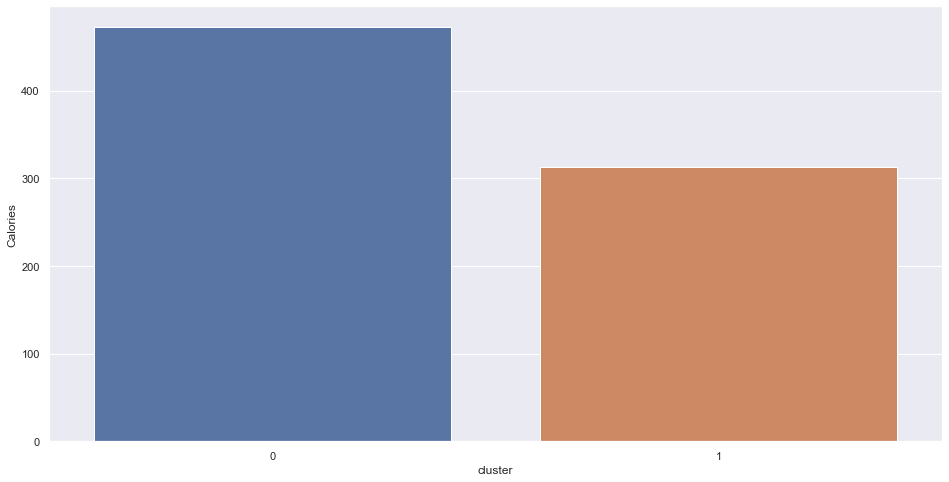

In [8]:
sns.barplot(data=gpby, x=gpby.index, y='Calories')

Pelo gráfico acima, temos que o grupo **0** possui uma média maior de calorias, enquanto que o grupo **1** tem uma média menor.

In [9]:
c0 = []
c1 = []
for category in df['Category'].unique():   
    c0.append(len(df[(df['Category'] == category) & (df['cluster'] == 0)]))
    c1.append(len(df[(df['Category'] == category) & (df['cluster'] == 1)]))

dfcats = pd.DataFrame({'Category': df['Category'].unique(), 'Cluster 0': c0, 'Cluster 1': c1})

<AxesSubplot:xlabel='Category', ylabel='Cluster 1'>

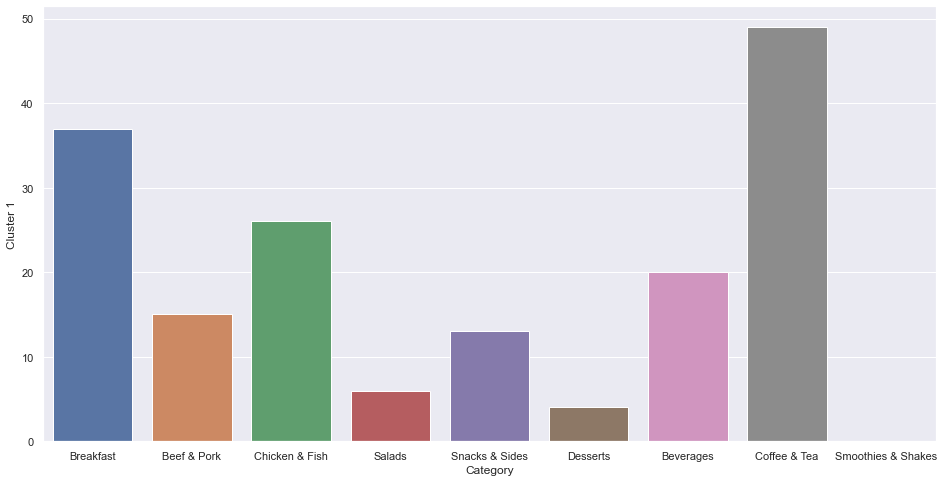

In [10]:
sns.barplot(data=dfcats, x='Category', y='Cluster 1')

<AxesSubplot:xlabel='Category', ylabel='Cluster 0'>

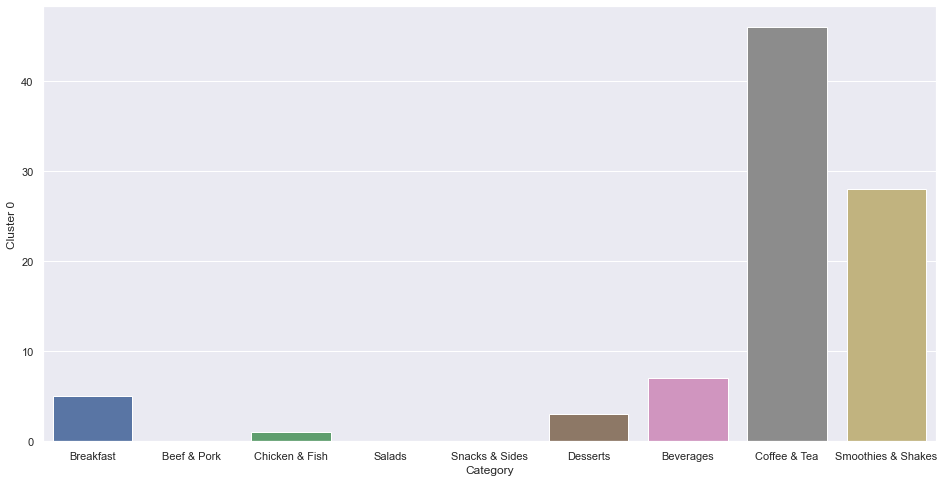

In [11]:
sns.barplot(data=dfcats, x='Category', y='Cluster 0')

<AxesSubplot:xlabel='Category', ylabel='Cluster 1'>

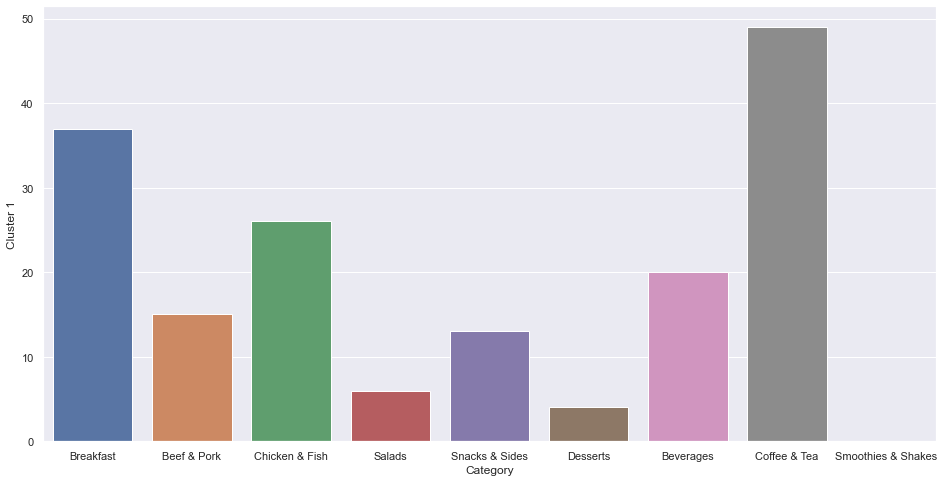

In [12]:
sns.barplot(data=dfcats, x='Category', y='Cluster 1')

Por fim, pelos dois gráficos acima, percebe-se que aqueles produtos classificados como **Smoothies & Shakes** foram todos atribuídos ao grupo **0**, enquanto que **Salads**, **Snacks & Sides**, e **Beef & Chicken**, estão completamente no grupo **1**. Já a categoria **Breakfast**, **Beverages**, e **Chicken & Fish** estão majoritariamente em **1**, as categorias **Desserts** e **Coffee & Tea** estão praticamente divididas igualmente entre os grupos. O que indica uma maior diversidade de produtos no grupo **1**.

## Conclusão

Como vimos, o conjunto de dados que estamos utilizando para o projeto não é adequado para realizar essa tarefa, sendo utilizado um conjunto alternativo que é mais adequado por possuir um maior número de atributos numéricos. Selecionamos as colunas **Carboidratos** e **Açúcares** com o objetivo de fazer uma análise de como o menu do McDonald's pode ser dividido com base nesses dois atributos.

Notamos que os grupos possuem uma média de calorias bem distinta, e que um dos grupo possui uma diversidade grande de produtos de categorias distintas.

Por fim, por não ser a base de dados originalmente proposta, não acreditamos que essa atividade possa vir a sugerir novas perguntas para os dados que tinhamos proposto.